## Importing all the necessary basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import pydoc

## Reading the dataset

In [2]:
df = pd.read_csv('Sales.csv')
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


## EDA

Performing basic feature engineering for missing values, duplicated values or outliers

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [4]:
df

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


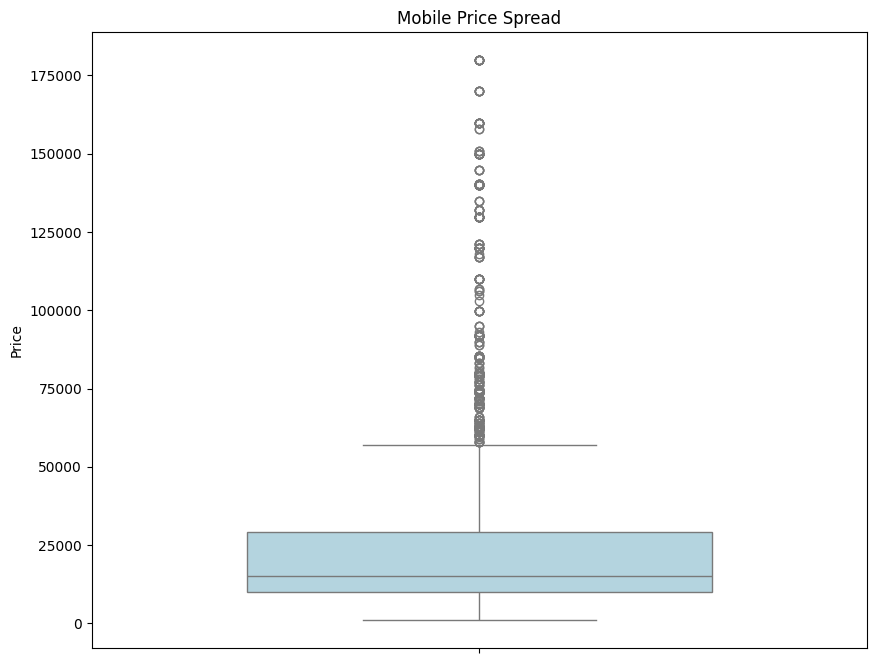

In [5]:
plt.figure(figsize=(10, 8))
plt.title('Mobile Price Spread')

sns.boxplot(y=df['Selling Price'], color='lightblue', width=0.6, orient='v')

plt.ylabel('Price')
plt.xlabel('')
plt.show()

C:\Users\buzzp\AppData\Local\Temp\ipykernel_8956\3265543775.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Brands', y='Selling Price', data=df, ci=None, palette='viridis')
C:\Users\buzzp\AppData\Local\Temp\ipykernel_8956\3265543775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brands', y='Selling Price', data=df, ci=None, palette='viridis')


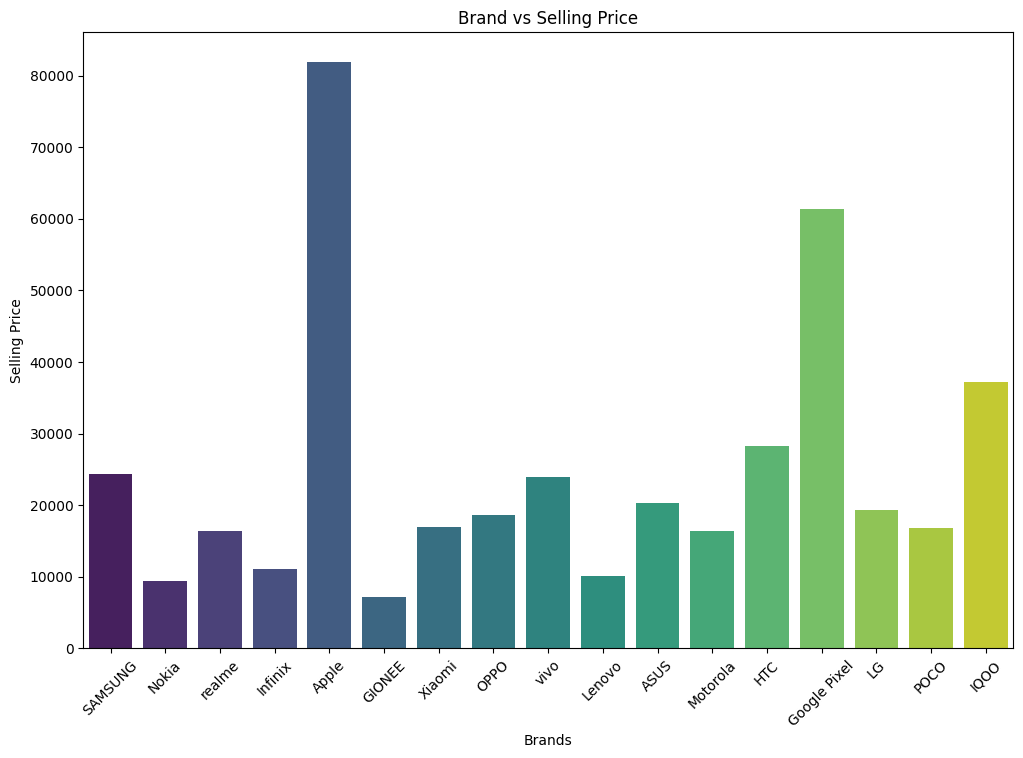

In [6]:
plt.figure(figsize=(12, 8))

# Create a bar plot of Brand versus Original Price
sns.barplot(x='Brands', y='Selling Price', data=df, ci=None, palette='viridis')

plt.xlabel('Brands')
plt.ylabel('Selling Price')
plt.title('Brand vs Selling Price')
plt.xticks(rotation=45)

plt.show()

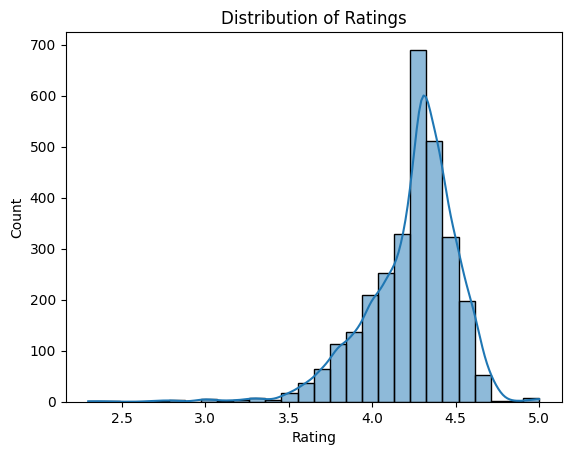

In [7]:
df_rating = df['Rating']
sns.histplot(df_rating, bins=28, kde=True)
plt.title('Distribution of Ratings')
plt.show()

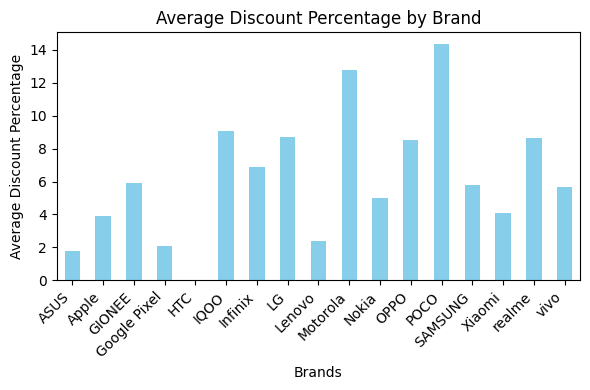

In [8]:
brand_discount = df.groupby('Brands')['discount percentage'].mean()
plt.figure(figsize=(6, 4))
brand_discount.plot(kind='bar', color='skyblue')
plt.title('Average Discount Percentage by Brand')
plt.xlabel('Brands')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Handling missing values and encoding

In [9]:
imp = SimpleImputer(strategy='mean')

In [10]:
#Splitting the column at the Space delimeter
df[['Storage Size', 'Storage Unit']] = df['Storage'].str.split(' ', n=1,expand=True)

In [11]:
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Storage Size,Storage Unit
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,128,GB
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,16,GB
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563,NaN,NaN
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000,64,GB
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000,64,GB


In [12]:
#Defining function to add weights for storage

def weight(row):
    if row['Storage Unit'] == 'MB':
        return row['Storage Size']/1024
    elif row['Storage Unit'] == 'TB':
        return row['Storage Size'] * 1024
    else: 
        return row['Storage Size']
    
df['Storage Size'] = pd.to_numeric(df['Storage Size'],errors='coerce')
df['Adjusted Storage Size'] = df.apply(weight,axis=1)

In [13]:
df['Adjusted Storage Size'].value_counts()

64.000000      774
128.000000     764
32.000000      555
16.000000      322
256.000000     240
8.000000       133
512.000000      67
4.000000        56
0.001953        45
0.003906        28
1024.000000     14
0.015625        14
0.125000        12
0.007812         6
0.062500         3
129.000000       3
0.250000         3
0.046875         3
0.500000         2
130.000000       2
0.097656         2
0.149414         1
0.009766         1
0.136719         1
Name: Adjusted Storage Size, dtype: int64

In [14]:
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Storage Size,Storage Unit,Adjusted Storage Size
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,128.0,GB,128.0
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,16.0,GB,16.0
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563,NaN,NaN,NaN
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000,64.0,GB,64.0
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000,64.0,GB,64.0


In [15]:
#adding in place of the missing values and dropping the uneccessary columns
df['Adjusted Storage Size'] = imp.fit_transform(df['Adjusted Storage Size'].values.reshape(-1,1))
df = df.drop(['Storage','Storage Size','Storage Unit'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brands                 3114 non-null   object 
 1   Models                 3114 non-null   object 
 2   Colors                 3114 non-null   object 
 3   Memory                 3071 non-null   object 
 4   Camera                 3114 non-null   object 
 5   Rating                 2970 non-null   float64
 6   Selling Price          3114 non-null   int64  
 7   Original Price         3114 non-null   int64  
 8   Mobile                 3114 non-null   object 
 9   Discount               3114 non-null   int64  
 10  discount percentage    3114 non-null   float64
 11  Adjusted Storage Size  3114 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 292.1+ KB


In [16]:
df[['Memory Size', 'Memory Unit']] = df['Memory'].str.split(' ', n=1,expand=True)
def weight_Memory(row):
    if row['Memory Unit'] == 'MB':
        return row['Memory Size']/1024
    else: 
        return row['Memory Size']
    
    
df['Memory Size'] = pd.to_numeric(df['Memory Size'],errors='coerce')
df['Adjusted Memory Size'] = df.apply(weight_Memory,axis=1)


In [17]:
df['Adjusted Memory Size']

0       8.0
1       2.0
2       2.0
3       4.0
4       NaN
       ... 
3109    6.0
3110    NaN
3111    2.0
3112    6.0
3113    3.0
Name: Adjusted Memory Size, Length: 3114, dtype: float64

In [18]:
df['Adjusted Memory Size'] = imp.fit_transform(df['Adjusted Memory Size'].values.reshape(-1,1))
df = df.drop(['Memory Unit','Memory Size','Memory'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brands                 3114 non-null   object 
 1   Models                 3114 non-null   object 
 2   Colors                 3114 non-null   object 
 3   Camera                 3114 non-null   object 
 4   Rating                 2970 non-null   float64
 5   Selling Price          3114 non-null   int64  
 6   Original Price         3114 non-null   int64  
 7   Mobile                 3114 non-null   object 
 8   Discount               3114 non-null   int64  
 9   discount percentage    3114 non-null   float64
 10  Adjusted Storage Size  3114 non-null   float64
 11  Adjusted Memory Size   3114 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 292.1+ KB


In [19]:
#Checking the values of rating
df['Rating'].value_counts()

4.3    690
4.4    512
4.2    329
4.5    322
4.1    252
4.0    209
4.6    197
3.9    136
3.8    114
3.7     65
4.7     52
3.6     36
3.5     17
3.3      8
5.0      7
3.0      6
3.4      3
2.8      3
3.2      3
2.7      2
4.8      2
3.1      2
4.9      1
2.4      1
2.3      1
Name: Rating, dtype: int64

In [20]:
df['Rating'] = imp.fit_transform(df['Rating'].values.reshape(-1,1))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brands                 3114 non-null   object 
 1   Models                 3114 non-null   object 
 2   Colors                 3114 non-null   object 
 3   Camera                 3114 non-null   object 
 4   Rating                 3114 non-null   float64
 5   Selling Price          3114 non-null   int64  
 6   Original Price         3114 non-null   int64  
 7   Mobile                 3114 non-null   object 
 8   Discount               3114 non-null   int64  
 9   discount percentage    3114 non-null   float64
 10  Adjusted Storage Size  3114 non-null   float64
 11  Adjusted Memory Size   3114 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 292.1+ KB


In [21]:
#Checking the counts of brands for the purpose of lable encoding
df['Brands'].value_counts()

SAMSUNG         719
Apple           387
realme          327
OPPO            260
Nokia           213
Xiaomi          198
Infinix         151
GIONEE          129
vivo            124
Lenovo          121
ASUS            118
Motorola        105
LG               99
POCO             74
HTC              55
Google Pixel     29
IQOO              5
Name: Brands, dtype: int64

In [22]:
#Encoding Brands that have counts less
brand_counts = df['Brands'].value_counts()

def brand_encoder(brand):
    return 'other' if brand_counts[brand] < 50 else brand

df['Brands'] = df['Brands'].apply(brand_encoder)

In [23]:
df['Brands'].value_counts()

SAMSUNG     719
Apple       387
realme      327
OPPO        260
Nokia       213
Xiaomi      198
Infinix     151
GIONEE      129
vivo        124
Lenovo      121
ASUS        118
Motorola    105
LG           99
POCO         74
HTC          55
other        34
Name: Brands, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Brands'] = le.fit_transform(df['Brands'])
df['Brands'].value_counts()

11    719
1     387
14    327
9     260
8     213
12    198
4     151
2     129
15    124
6     121
0     118
7     105
5      99
10     74
3      55
13     34
Name: Brands, dtype: int64

In [25]:
df.head()

,Brands,Models,Colors,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Adjusted Storage Size,Adjusted Memory Size
0,11,GALAXY M31S,Mirage Black,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,128.000000,8.000000
1,8,3.2,Steel,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,16.000000,2.000000
2,14,C2,Diamond Black,Yes,4.4,6999,7999,realme C2,1000,12.501563,92.513777,2.000000
3,4,Note 5,Ice Blue,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000,64.000000,4.000000
4,1,iPhone 11,Black,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000,64.000000,4.137282


<Axes: >

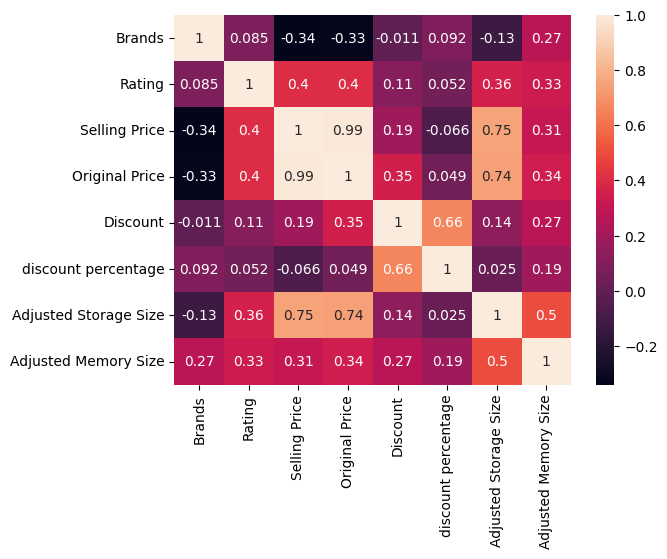

In [26]:
sns.heatmap(df.drop(['Models','Colors','Mobile','Camera'],axis=1).corr(),annot=True)

In [27]:
df['Models'] = le.fit_transform(df['Models'])
df['Colors'] = le.fit_transform(df['Colors'])

In [28]:
df.head()

,Brands,Models,Colors,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Adjusted Storage Size,Adjusted Memory Size
0,11,285,356,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,128.000000,8.000000
1,8,45,562,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,16.000000,2.000000
2,14,171,174,Yes,4.4,6999,7999,realme C2,1000,12.501563,92.513777,2.000000
3,4,583,270,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000,64.000000,4.000000
4,1,886,46,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000,64.000000,4.137282


In [29]:
df['Camera'].value_counts()

Yes    3114
Name: Camera, dtype: int64

In [30]:
df['Camera'] = df['Camera'].apply(lambda x: 1 if x=='Yes' else 0)

In [31]:
df.head()

,Brands,Models,Colors,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Adjusted Storage Size,Adjusted Memory Size
0,11,285,356,1,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,128.000000,8.000000
1,8,45,562,1,3.8,10199,10199,Nokia 3.2,0,0.000000,16.000000,2.000000
2,14,171,174,1,4.4,6999,7999,realme C2,1000,12.501563,92.513777,2.000000
3,4,583,270,1,4.2,12999,12999,Infinix Note 5,0,0.000000,64.000000,4.000000
4,1,886,46,1,4.6,49900,49900,Apple iPhone 11,0,0.000000,64.000000,4.137282


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brands                 3114 non-null   int32  
 1   Models                 3114 non-null   int32  
 2   Colors                 3114 non-null   int32  
 3   Camera                 3114 non-null   int64  
 4   Rating                 3114 non-null   float64
 5   Selling Price          3114 non-null   int64  
 6   Original Price         3114 non-null   int64  
 7   Mobile                 3114 non-null   object 
 8   Discount               3114 non-null   int64  
 9   discount percentage    3114 non-null   float64
 10  Adjusted Storage Size  3114 non-null   float64
 11  Adjusted Memory Size   3114 non-null   float64
dtypes: float64(4), int32(3), int64(4), object(1)
memory usage: 255.6+ KB


<Axes: >

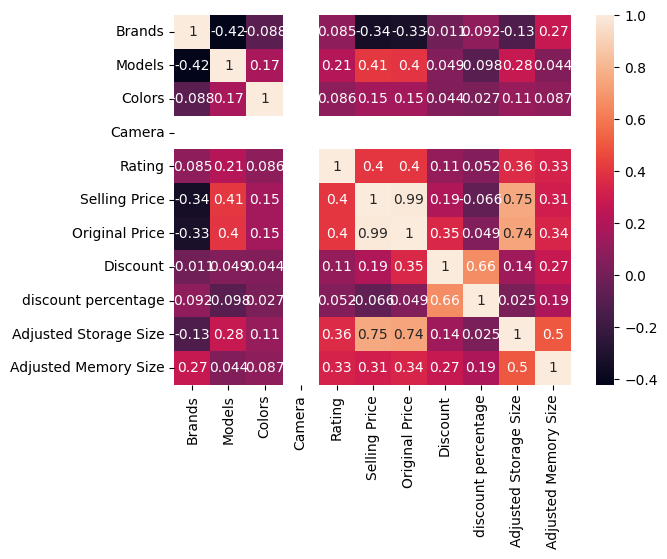

In [33]:
sns.heatmap(df.drop('Mobile',axis=1).corr(),annot=True)

In [34]:
df = df.drop(['Camera','Mobile'],axis=1)

In [35]:
df.head()

,Brands,Models,Colors,Rating,Selling Price,Original Price,Discount,discount percentage,Adjusted Storage Size,Adjusted Memory Size
0,11,285,356,4.3,19330,20999,1669,7.947998,128.000000,8.000000
1,8,45,562,3.8,10199,10199,0,0.000000,16.000000,2.000000
2,14,171,174,4.4,6999,7999,1000,12.501563,92.513777,2.000000
3,4,583,270,4.2,12999,12999,0,0.000000,64.000000,4.000000
4,1,886,46,4.6,49900,49900,0,0.000000,64.000000,4.137282


## Train, Test, Split + Fitting

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=['Selling Price','Original Price'])
y = df['Selling Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_scaled shape: (2491, 8)
X_test_scaled shape: (623, 8)
y_train shape: (2491,)
y_test shape: (623,)


## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = LinearRegression()

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)
print("mean_absolute_error:", mae)

Mean Squared Error (MSE): 235473321.186077
R-squared: 0.7316011945612633
mean_absolute_error: 10135.860398277493


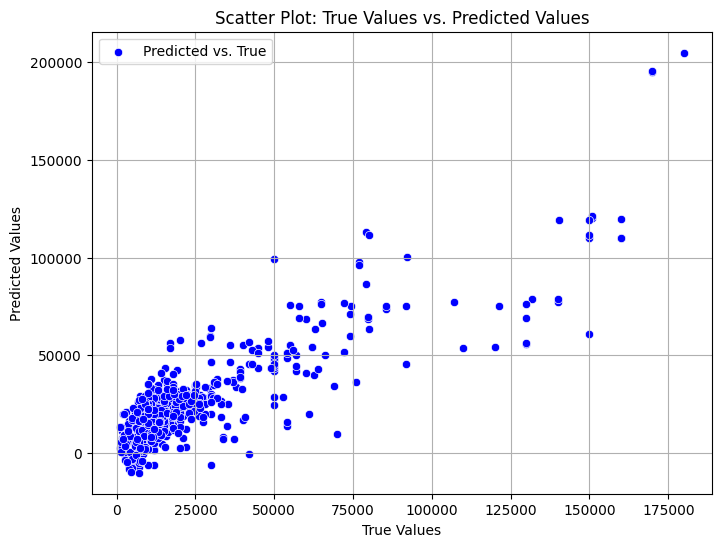

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs. True')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: True Values vs. Predicted Values')
plt.grid(True)
plt.show()

DecisionTreeRegressor

In [39]:
from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor(random_state=42)


model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


print("Decision Tree Regression:")
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Decision Tree Regression:
Mean Squared Error (MSE): 75498076.27831282
R-squared: 0.913945268262433


RandomForestRegressor

In [40]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(random_state=42)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Random Forest Regression:")
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Random Forest Regression:
Mean Squared Error (MSE): 41824816.78325292
R-squared: 0.9523269523452796


The alternate way with Original Price Included without the discount

In [41]:
X = df.drop(columns=['Selling Price'])
y = df['Selling Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = LinearRegression()

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print out the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 1.5714944572237768e-21
R-squared: 1.0
Mean Absolute Error (MAE): 2.903667675483715e-11


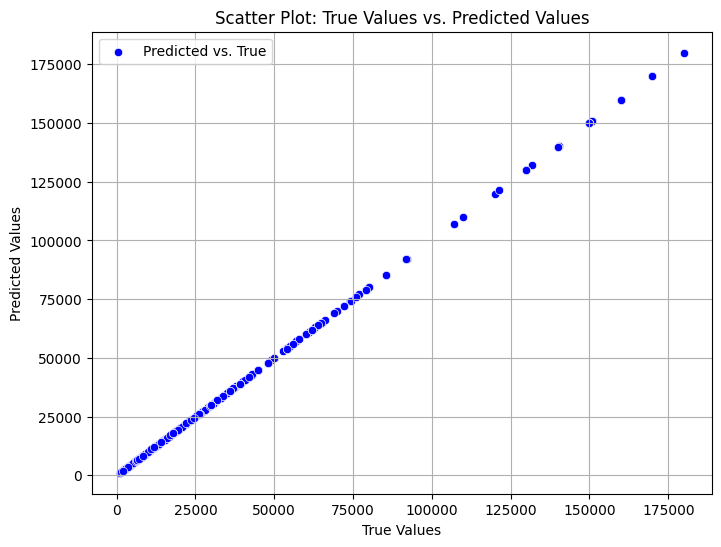

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs. True')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: True Values vs. Predicted Values')
plt.grid(True)
plt.show()